In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import statistics as st
from calendar import isleap

In [2]:
# Read Orography
OroData = xr.open_dataset('../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5IGP_Orography.nc')
OroD = OroData.sel(latitude=slice(32,24),longitude=slice(74,86))
# create mask
oro = OroD.z
oro.values = OroD.z.values/9.81
oro.attrs
oro.attrs['units']='meter'
oro.attrs['long_name']='Orography'
oro.values[oro.values>500.1]=np.NaN
mask=oro.values/oro.values

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


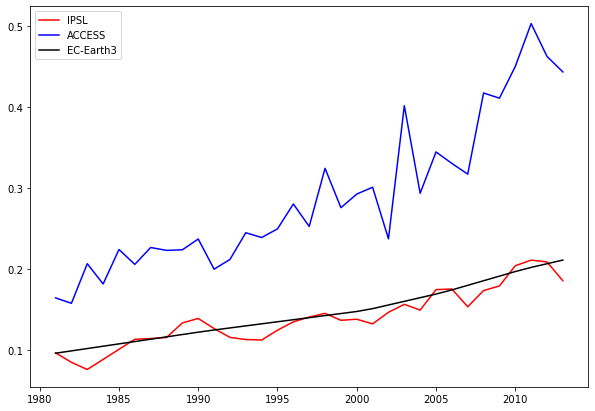

In [15]:
AODHistvals=[]
# AOD Data
AODDataIPSL = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHod550aer_AERmon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc')
AODDataIPSL.od550aer.time[0]
histAODIPSL=AODDataIPSL.sel(latitude=slice(32,24),longitude=slice(74,86)).od550aer
histAODIPSL[1].values
histAODIPSL.values=histAODIPSL.values*mask

# Area Average
aodTS1=histAODIPSL.mean(dim=['latitude','longitude'], skipna=True)

aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2014-1-31')))
x=np.arange(1981,2014)
histAODTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histAODTs.append(aodT.mean())
AODHistvals.append(histAODTs) 

# AOD Data
AODDataACCESS = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHod550aer_AERmon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc')
AODDataACCESS.od550aer.time[0]
histAOD=AODDataACCESS.sel(latitude=slice(32,24),longitude=slice(74,86)).od550aer
histAOD[1].values
histAOD.values=histAOD.values*mask


# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)

aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2014-1-31')))
histAODTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histAODTs.append(aodT.mean())
AODHistvals.append(histAODTs)


AODDataESM = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHanthrop_iitmesm_1850_2015_historig_AOD550nm.nc')
#AODDataIPSL.od550aer.time[0]
AODDataESM=AODDataESM.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
#histAOD[0].values
AODDataESM[1].values
AODDataESM.values=AODDataESM.values*mask
t1=pd.to_datetime(AODDataESM.time, format='%Y%m%d')

AODDataESM['time']=t1
#histAODIPSL.assign_coords(time=t1)

# Area Average
aodTS1=AODDataESM.mean(dim=['latitude','longitude'], skipna=True)

aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2014-1-31')))
histAODTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histAODTs.append(aodT.mean())
AODHistvals.append(histAODTs)



   


fig = plt.figure(figsize=(10,7))
plt.plot(x,AODHistvals[0],label='IPSL',color='Red')
plt.plot(x,AODHistvals[1],label='ACCESS',color='Blue')

plt.plot(x,AODHistvals[2],label='EC-Earth3',color='Black')
plt.legend()

plt.savefig('HistAOD_Total.eps')
plt.show()

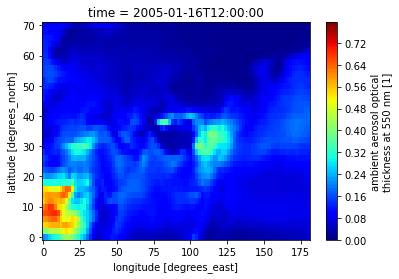

In [39]:
levels=np.arange(0,0.8,0.005)
IPSLAOD2005=AODDataIPSL.sel(latitude=slice(70,0),longitude=slice(0,180),time=slice('2005-1-1','2005-1-31')).od550aer
#IPSLAOD2005.values=IPSLAOD2005.values*mask
IPSLAOD2005.plot(cmap='jet',levels=levels)
plt.savefig('SpatialJan2005_IPSL_LargerRegion.eps')
plt.show()

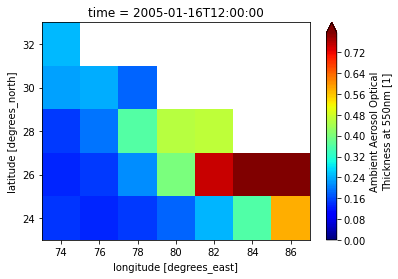

In [30]:
ACCESSAOD2005=AODDataACCESS.sel(latitude=slice(32,24),longitude=slice(74,86),time=slice('2005-1-1','2005-1-31')).od550aer
ACCESSAOD2005.values=ACCESSAOD2005.values*mask
ACCESSAOD2005.plot(cmap='jet',levels=levels)
plt.savefig('SpatialJan2005_ACCESS.eps')
plt.show()

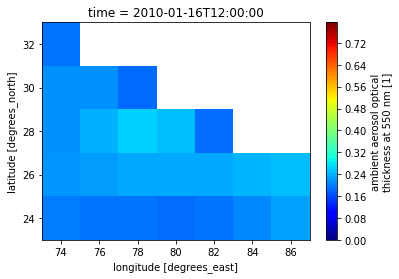

In [32]:
IPSLAOD2005=AODDataIPSL.sel(latitude=slice(32,24),longitude=slice(74,86),time=slice('2010-1-1','2010-1-31')).od550aer
IPSLAOD2005.values=IPSLAOD2005.values*mask
IPSLAOD2005.plot(cmap='jet',levels=levels)
plt.savefig('SpatialJan2010_IPSL.eps')
plt.show()

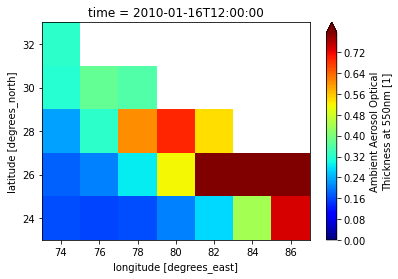

In [31]:
ACCESSAOD2005=AODDataACCESS.sel(latitude=slice(32,24),longitude=slice(74,86),time=slice('2010-1-1','2010-1-31')).od550aer
ACCESSAOD2005.values=ACCESSAOD2005.values*mask
ACCESSAOD2005.plot(cmap='jet',levels=levels)
plt.savefig('SpatialJan2010_ACCESS.eps')
plt.show()

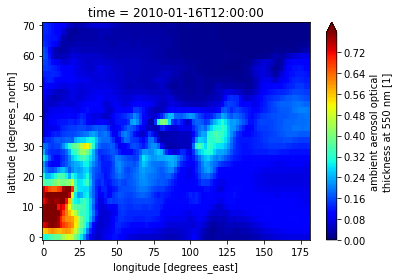

In [40]:
levels=np.arange(0,0.8,0.005)
IPSLAOD2005=AODDataIPSL.sel(latitude=slice(70,0),longitude=slice(0,180),time=slice('2010-1-1','2010-1-31')).od550aer
#IPSLAOD2005.values=IPSLAOD2005.values*mask
IPSLAOD2005.plot(cmap='jet',levels=levels)
plt.savefig('SpatialJan2010_IPSL_LargerRegion.eps')
plt.show()